In [1]:
import networkx as nx
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
import nb_general as nb

The following is the derivation of the non-backtracking pagerank when a graph $G$ is bipartite and biregular. It should first be recalled that the matrix $B$ can be written as $$B=\begin{pmatrix}0&B_2\\B_1&0\end{pmatrix}.$$

We also recall that Arrigo et al derived the formula for non-backtracking pagerank:
$$(I-\alpha B^T\hat{D}^{-1})\hat{y}=\frac{(1-\alpha)}{n}T^T(TT^T)^{-1}\mathbf{1},$$
where $\hat{D}$ is the edge degree matrix and $T$ is the degree out matrix. Since $G$ is bipartite, 
$$T=\begin{pmatrix}T_1&0\\0&T_2\end{pmatrix}.$$

To verify the derivation, let $G=K_{2,4}$.

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


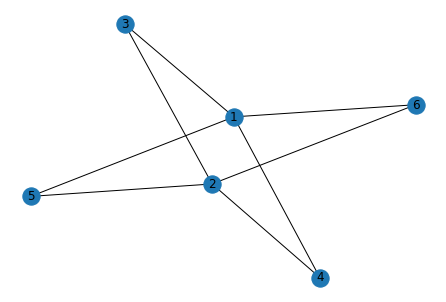

In [2]:
G = nx.Graph()
G.add_nodes_from(range(1,7))
G.add_edges_from([[1,3],[1,4],[1,5],[1,6],[2,3],[2,4],[2,5],[2,6]])
# G = nx.bipartite.random_graph(3,3,.7)
nx.draw(G,with_labels=True)
plt.show()

In [3]:
A = nx.adjacency_matrix(G).todense()
D = np.diag(np.array(A.sum(axis=1)).reshape((6,)))
S, T = nb.create_s_t(G)
C, B = nb.to_edge_space(G,graph=False, B = True)
D_hat = np.diag(np.array(B.sum(axis=1)).reshape((B.shape[1],)))

We now derive the pagerank vector of a bipartite graph.
Arrigo et al's formula becomes
$$\Biggl(\begin{pmatrix}I_1&0\\0&I_2\end{pmatrix}-\alpha\begin{pmatrix}0&B_1^T\\B_2^T&0\end{pmatrix}\begin{pmatrix}\frac{1}{d_2-1}&0\\0&\frac{1}{d_1-1}\end{pmatrix}\Biggr)\hat{y}=\frac{1-\alpha}{n}\begin{pmatrix}T_1^T&0\\0&T_2^T\end{pmatrix}\begin{pmatrix}\frac{1}{d_1}&0\\0&\frac{1}{d_2}\end{pmatrix}\mathbf{1}.$$
In this $d_1$ is the degree of the first partition, and $d_2$ is the degree of the second partition.

The following code verifies that $\hat{D}^{-1}=\begin{pmatrix}\frac{1}{d_2-1}&0\\0&\frac{1}{d_1-1}\end{pmatrix}$ and $TT^T=\begin{pmatrix}d_1&0\\0&d_2\end{pmatrix}$.

In [4]:
d_1 = int(D[0,0])
d_2 = int(D[-1,-1])
print(f'$d_1$={d_1}')
print(f'$d_2$={d_2}')

# Check \hat{D}^{-1}
print(f'D_hat={D_hat}')

# Check TT^T
print(f'TT^T={T@T.T}')

$d_1$=4
$d_2$=2
D_hat=[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]
TT^T=[[4. 0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 2.]]


We examine the right side of the equation. On the right side we have
$$\frac{1-\alpha}{n}\begin{pmatrix}T_1^T&0\\0&T_2^T\end{pmatrix}\begin{pmatrix}\frac{1}{d_1}&0\\0&\frac{1}{d_2}\end{pmatrix}\mathbf{1}.$$
Multiplying we get 
$$\frac{1-\alpha}{n}\begin{pmatrix}\frac{1}{d_1}T_1^T&0\\0&\frac{1}{d_2}T_2^T\end{pmatrix}\mathbf{1}.$$
Recall that $T$ is the out degree matrix. Thus $T^T\mathbf{1}$ count the number of nodes that point to a certain edge (the edge in-degree). Note that edges can only have on degree pointing to them. So $T^T\mathbf{1}=\mathbf{1}$ (i.e., 1 is an eigenvalue of $T^T$ with eigenvector $\mathbf{1}$). We can then simplify the right side of the equation to
$$\frac{1-\alpha}{n}\begin{pmatrix}\frac{1}{d_1}\mathbf{1}\\\frac{1}{d_2}\mathbf{1}\end{pmatrix}.$$

The following confirms that $T^T$ has an eigenvector $\mathbf{1}$ with eigenvalue 1. We also confirm the right side of the equation.

In [5]:
T.T.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
T.T@(la.solve(T@T.T,np.eye(T.shape[0])))@np.ones(T.shape[0])

array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 ])

Knowing this, the pagerank equation becomes
$$\Biggl(\begin{pmatrix}I_1&0\\0&I_2\end{pmatrix}-\alpha\begin{pmatrix}0&\frac{1}{d_1-1}B_1^T\\\frac{1}{d_2-1}B_2^T\end{pmatrix}\Biggr)\hat{y}=\frac{1-\alpha}{n}\begin{pmatrix}\frac{1}{d_1}\mathbf{1}\\\frac{1}{d_2}\mathbf{1}\end{pmatrix}.$$
We use the inverse of the matrix on the left side of the equation to get
$$\hat{y}=\frac{1-\alpha}{n}\Biggl(\begin{pmatrix}I_1&0\\0&I_2\end{pmatrix}-\alpha\begin{pmatrix}0&\frac{1}{d_1-1}B_1^T\\\frac{1}{d_2-1}B_2^T\end{pmatrix}\Biggr)^{-1}\begin{pmatrix}\frac{1}{d_1}\mathbf{1}\\\frac{1}{d_2}\mathbf{1}\end{pmatrix}.$$
We note the solution to a geometric series on the right side of the equation and replace the inverse matrix with a geometric series.
$$\hat{y}=\frac{1-\alpha}{n}\Biggl(\sum_{r=0}^\infty\alpha^r\begin{pmatrix}0&\frac{1}{d_1-1}B_1^T\\\frac{1}{d_2-1}B_2^T\end{pmatrix}^r\Biggr)\begin{pmatrix}\frac{1}{d_1}\mathbf{1}\\\frac{1}{d_2}\mathbf{1}\end{pmatrix}$$
By induction, we can rewrite this sum as
$$\sum_{r=0}^\infty\alpha^r\begin{pmatrix}0&\frac{1}{d_1-1}B_1^T\\\frac{1}{d_2-1}B_2^T\end{pmatrix}^r=\sum_{r=0}^\infty\alpha^{2r}\begin{pmatrix}\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_1^TB_2^T\Bigr)^r&0\\0&\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_2^TB_1^T\Bigr)^r\end{pmatrix}+\sum_{r=0}^\infty\alpha^{2r+1}\begin{pmatrix}0&\frac{1}{d_1-1}B_1^T\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_2^TB_1^T\Bigr)^r\\\frac{1}{d_2-1}B_2^T\Bigr(\frac{1}{(d_1-1)(d_2-1)}B_1^TB_2^T\Bigr)^r&0\end{pmatrix}.$$
So we can rewrite the pagerank equation as
$$\hat{y}=\frac{1-\alpha}{n}\Biggl(\sum_{r=0}^\infty\alpha^{2r}\begin{pmatrix}\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_1^TB_2^T\Bigr)^r&0\\0&\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_2^TB_1^T\Bigr)^r\end{pmatrix}+\sum_{r=0}^\infty\alpha^{2r+1}\begin{pmatrix}0&\frac{1}{d_1-1}B_1^T\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_2^TB_1^T\Bigr)^r\\\frac{1}{d_2-1}B_2^T\Bigr(\frac{1}{(d_1-1)(d_2-1)}B_1^TB_2^T\Bigr)^r&0\end{pmatrix}\Biggr)\begin{pmatrix}\frac{1}{d_1}\mathbf{1}\\\frac{1}{d_2}\mathbf{1}\end{pmatrix}.$$
We now distribute the vector $\begin{pmatrix}\frac{1}{d_1}\mathbf{1}&\frac{1}{d_2}\mathbf{1}\end{pmatrix}^T$. This results in the equation
$$\hat{y}=\frac{1-\alpha}{n}\Biggl(\sum_{r=0}^\infty\alpha^{2r}\begin{pmatrix}\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_1^TB_2^T\Bigr)^r&0\\0&\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_2^TB_1^T\Bigr)^r\end{pmatrix}\begin{pmatrix}\frac{1}{d_1}\mathbf{1}\\\frac{1}{d_2}\mathbf{1}\end{pmatrix}+\sum_{r=0}^\infty\alpha^{2r+1}\begin{pmatrix}0&\frac{1}{d_1-1}B_1^T\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_2^TB_1^T\Bigr)^r\\\frac{1}{d_2-1}B_2^T\Bigr(\frac{1}{(d_1-1)(d_2-1)}B_1^TB_2^T\Bigr)^r&0\end{pmatrix}\begin{pmatrix}\frac{1}{d_1}\mathbf{1}\\\frac{1}{d_2}\mathbf{1}\end{pmatrix}\Biggr).$$
Multiplying each matrix by $\begin{pmatrix}\frac{1}{d_1}\mathbf{1}&\frac{1}{d_2}\mathbf{1}\end{pmatrix}^T$, we get
$$\hat{y}=\frac{1-\alpha}{n}\Biggl(\sum_{r=0}^\infty\alpha^{2r}\begin{pmatrix}\frac{1}{d_1}\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_1^TB_2^T\Bigr)^r\mathbf{1}\\\frac{1}{d_2}\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_2^TB_1^T\Bigr)^r\mathbf{1}\end{pmatrix}+\sum_{r=0}^\infty\alpha^{2r+1}\begin{pmatrix}\frac{1}{d_2(d_1-1)}B_1^T\Bigl(\frac{1}{(d_1-1)(d_2-1)}B_2^TB_1^T\Bigr)^r\mathbf{1}\\\frac{1}{d_1(d_2-1)}B_2^T\Bigr(\frac{1}{(d_1-1)(d_2-1)}B_1^TB_2^T\Bigr)^r\mathbf{1}\end{pmatrix}\Biggr).$$

We now show that both $B_1^T$ and $B_2^T$ have $\mathbf{1}$ as an eigenvector. 
Note that $B$ is biregular and $B_1$ is an adjacency matrix mapping edges from partition 1 to edges from partition 2 (similarly $B_2$ maps from 2 to 1). Thus, $B_1^T\mathbf{1}$ will count the number of incoming edges to partition 1 from partition 2. This is the same as counting the number of edges leaving a node from partition 1 to parition 2 (the degree of nodes in parition 1). Thus, $B_1^T\mathbf{1}=(d_1-1)\mathbf{1}$. Similarly $B_2^T\mathbf{1}=(d_2-1)\mathbf{1}$.

The following code shows this is true for our example.

In [7]:
B1 = B[8:,:8]
B2 = B[:8,8:]

In [8]:
np.allclose(B1.T@np.ones(B1.shape[0]),d_1-1)

True

In [9]:
np.allclose(B2.T@np.ones(B2.shape[0]),d_2-1)

True

Since $B_1^T$ and $B_2^T$ have $\mathbf{1}$ as an eigenvector, we can simplify our equation yet again.
$$\hat{y}=\frac{1-\alpha}{n}\Biggl(\sum_{r=0}^\infty\alpha^{2r}\begin{pmatrix}\frac{1}{d_1}\Bigl(\frac{(d_1-1)(d_2-1)}{(d_1-1)(d_2-1)}\mathbf{1}\Bigr)^r\\\frac{1}{d_2}\Bigl(\frac{(d_1-1)(d_2-1)}{(d_1-1)(d_2-1)}\mathbf{1}\Bigr)^r\end{pmatrix}+\sum_{r=0}^\infty\alpha^{2r+1}\begin{pmatrix}\frac{1}{d_2(d_1-1)}B_1^T\Bigl(\frac{(d_1-1)(d_2-1)}{(d_1-1)(d_2-1)}\mathbf{1}\Bigr)^r\\\frac{1}{d_1(d_2-1)}B_2^T\Bigr(\frac{(d_1-1)(d_2-1)}{(d_1-1)(d_2-1)}\mathbf{1}\Bigr)^r\end{pmatrix}\Biggr)$$
This idea is shown to below for our example.

In [10]:
np.linalg.matrix_power(B1.T@B2.T,500)@np.ones(B1.shape[0])

array([3.63602918e+238, 3.63602918e+238, 3.63602918e+238, 3.63602918e+238,
       3.63602918e+238, 3.63602918e+238, 3.63602918e+238, 3.63602918e+238])

In [11]:
np.power(B1.T@B2.T@np.ones(B1.shape[0]),500)

array([3.63602918e+238, 3.63602918e+238, 3.63602918e+238, 3.63602918e+238,
       3.63602918e+238, 3.63602918e+238, 3.63602918e+238, 3.63602918e+238])

In [12]:
((d_1-1)*(d_2-1))**500

36360291795869936842385267079543319118023385026001623040346035832580600191583895484198508262979388783308179702534403855752855931517013066142992430916562025780021771247847643450125342836565813209972590371590152578728008385990139795377610001

We cancel and get
$$\hat{y}=\frac{1-\alpha}{n}\Biggl(\sum_{r=0}^\infty\alpha^{2r}\begin{pmatrix}\frac{1}{d_1}\mathbf{1}\\\frac{1}{d_2}\mathbf{1}\end{pmatrix}+\sum_{r=0}^\infty\alpha^{2r+1}\begin{pmatrix}\frac{1}{d_2(d_1-1)}B_1^T\mathbf{1}\\\frac{1}{d_1(d_2-1)}B_2^T\mathbf{1}\end{pmatrix}\Biggr).$$
Recall $B_i^T\mathbf{1}=d_i-1$. So our equation becomes
$$\hat{y}=\frac{1-\alpha}{n}\Biggl(\sum_{r=0}^\infty\alpha^{2r}\begin{pmatrix}\frac{1}{d_1}\mathbf{1}\\\frac{1}{d_2}\mathbf{1}\end{pmatrix}+\sum_{r=0}^\infty\alpha^{2r+1}\begin{pmatrix}\frac{1}{d_2}\mathbf{1}\\\frac{1}{d_1}\mathbf{1}\end{pmatrix}\Biggr).$$

Now we distribute the summation and get
$$\hat{y}=\frac{1-\alpha}{n}\Biggl(\begin{pmatrix}\Bigl(\sum_{r=0}^\infty\frac{(\alpha^2)^r}{d_1}\Bigr)\mathbf{1}\\\Bigl(\sum_{r=0}^\infty\frac{(\alpha^2)^r}{d_2}\Bigr)\mathbf{1}\end{pmatrix}+\begin{pmatrix}\Bigl(\sum_{r=0}^\infty\frac{\alpha^{2r+1}}{d_2}\Bigr)\mathbf{1}\\\Bigl(\sum_{r=0}^\infty\frac{\alpha^{2r+1}}{d_1}\Bigr)\mathbf{1}\end{pmatrix}\Biggr).$$
We pull out $d_1$ and $d_2$ where possible:
$$\hat{y}=\frac{1-\alpha}{n}\Biggl(\begin{pmatrix}\frac{1}{d_1}\Bigl(\sum_{r=0}^\infty(\alpha^2)^r\Bigr)\mathbf{1}\\\frac{1}{d_2}\Bigl(\sum_{r=0}^\infty(\alpha^2)^r\Bigr)\mathbf{1}\end{pmatrix}+\begin{pmatrix}\frac{1}{d_2}\Bigl(\sum_{r=0}^\infty\alpha^{2r+1}\Bigr)\mathbf{1}\\\frac{1}{d_1}\Bigl(\sum_{r=0}^\infty\alpha^{2r+1}\Bigr)\mathbf{1}\end{pmatrix}\Biggr).$$

By the law of exponents we have,
$$\hat{y}=\frac{1-\alpha}{n}\Biggl(\begin{pmatrix}\frac{1}{d_1}\Bigl(\sum_{r=0}^\infty(\alpha^2)^r\Bigr)\mathbf{1}\\\frac{1}{d_2}\Bigl(\sum_{r=0}^\infty(\alpha^2)^r\Bigr)\mathbf{1}\end{pmatrix}+\begin{pmatrix}\frac{\alpha}{d_2}\Bigl(\sum_{r=0}^\infty\alpha^{2r}\Bigr)\mathbf{1}\\\frac{\alpha}{d_1}\Bigl(\sum_{r=0}^\infty\alpha^{2r}\Bigr)\mathbf{1}\end{pmatrix}\Biggr).$$
Then pulling out the summation was have that
$$\hat{y}=\frac{1-\alpha}{n}\Biggl(\begin{pmatrix}\Bigl(\frac{1}{d_1}+\frac{\alpha}{d_2}\Bigr)\Bigl(\sum_{r=0}^\infty(\alpha^2)^r\Bigr)\mathbf{1}\\\Bigl(\frac{1}{d_2}+\frac{\alpha}{d_1}\Bigr)\Bigl(\sum_{r=0}^\infty(\alpha^2)^r\Bigr)\mathbf{1}\end{pmatrix}\Biggr).$$
Since $\alpha^2<1$, the summation converges to $\frac{1}{1-\alpha^2}$. Further, we simplify the fractions and get
$$\hat{y}=\frac{1-\alpha}{n}\Biggl(\begin{pmatrix}\Bigl(\frac{d_2+\alpha d_1}{d_1d_2}\Bigr)\Bigl(\frac{1}{1-\alpha^2}\Bigr)\mathbf{1}\\\Bigl(\frac{d_1+\alpha d_2}{d_1d_2}\Bigr)\Bigl(\frac{1}{1-\alpha^2}\Bigr)\mathbf{1}\end{pmatrix}\Biggr).$$
Pulling out constants we have
$$\hat{y}=\frac{1-\alpha}{nd_1d_2(1-\alpha^2)}\begin{pmatrix}(d_2+\alpha d_1)\mathbf{1}\\(d_1+\alpha d_2)\mathbf{1}\end{pmatrix}.$$
Note that $\frac{1-\alpha}{1-\alpha^2}=\frac{1}{1+\alpha}$. So we get
$$\hat{y}=\frac{1}{nd_1d_2(1+\alpha)}\begin{pmatrix}(d_2+\alpha d_1)\mathbf{1}\\(d_1+\alpha d_2)\mathbf{1}\end{pmatrix}.$$

The following checks the above statement with $\alpha=.5$.

In [13]:
eqn = lambda alpha: la.solve(np.eye(B.shape[0])-alpha*B.T@la.solve(D_hat,np.eye(D_hat.shape[0])),(1-alpha)/A.shape[0]*T.T@(la.solve(T@T.T,np.eye(T.shape[0])))@np.ones(T.T.shape[1]))

In [14]:
alpha = .5
y_hat = lambda alpha: (1/(6*d_1*d_2*(1+alpha)))*np.hstack(((d_2+alpha*d_1)*np.ones(B1.shape[0]),(d_1+alpha*d_2)*np.ones(B2.shape[0])))
print(y_hat(alpha))
print(eqn(alpha))
pr = nx.pagerank(nx.Graph(B,alpha=.9))
print(pr)
pr = np.array(list(pr.values()))
print(T@pr)
nx.pagerank(nx.Graph(A,alpha=.9))
print(T@y_hat(alpha))
print(nx.pagerank(G,alpha=.5))


[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.06944444 0.06944444 0.06944444 0.06944444
 0.06944444 0.06944444 0.06944444 0.06944444]
[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.06944444 0.06944444 0.06944444 0.06944444
 0.06944444 0.06944444 0.06944444 0.06944444]
{0: 0.0625, 1: 0.0625, 2: 0.0625, 3: 0.0625, 4: 0.0625, 5: 0.0625, 6: 0.0625, 7: 0.0625, 8: 0.0625, 9: 0.0625, 10: 0.0625, 11: 0.0625, 12: 0.0625, 13: 0.0625, 14: 0.0625, 15: 0.0625}
[0.25  0.25  0.125 0.125 0.125 0.125]
[0.22222222 0.22222222 0.13888889 0.13888889 0.13888889 0.13888889]
{1: 0.22222264607747394, 2: 0.22222264607747394, 3: 0.138888676961263, 4: 0.138888676961263, 5: 0.138888676961263, 6: 0.138888676961263}


Now to project $\hat{y}$ to the vertex space, we get
$$\begin{align}T\hat{y}&=\frac{1}{nd_1d_2(1+\alpha)}\begin{pmatrix}T_1&0\\0&T_2\end{pmatrix}\begin{pmatrix}(d_2+\alpha d_1)\mathbf{1}\\(d_1+\alpha d_2)\mathbf{1}\end{pmatrix}\\&=\frac{1}{nd_1d_2(1+\alpha)}\begin{pmatrix}(d_2+\alpha d_1)(T_1\mathbf{1})\\(d_1+\alpha d_2)(T_2\mathbf{1})\end{pmatrix}.\end{align}$$
Note that $T\mathbf{1}$ counts the number of outgoing edges from a given node. Thus, $T_1\mathbf{1}=d_1$ and $T_2\mathbf{1}=d_2$.

The following verifies in our example that $T_1\mathbf{1}=d_1$ and $T_2\mathbf{1}=d_2$.

In [15]:
T1 = T[:d_2,:T.shape[1]//2]
T2 = T[d_2:,T.shape[1]//2:]
print(np.allclose(T1@np.ones(T1.shape[1]),d_1))
print(np.allclose(T2@np.ones(T2.shape[1]),d_2))

True
True


Thus we simplify such that 
$$T\hat{y}=\frac{1}{nd_1d_2(1+\alpha)}\begin{pmatrix}(d_2+\alpha d_1)d_1\mathbb{1}\\(d_1+\alpha d_2)d_2\mathbb{1}\end{pmatrix}.$$
Some algebra gives
$$T\hat{y}=\frac{1}{n(1+\alpha)}\begin{pmatrix}1+\alpha\frac{d_1}{d_2}&0\\0&1+\alpha\frac{d_2}{d_1}\end{pmatrix}\mathbf{1}.$$
This is our pagerank vector for a non-backtracking random walk on a bipartite biregular graph.

The following code checks this claim for an example

In [16]:
nb_pr_bi = lambda alpha, d_1, d_2: 1/((d_1+d_2)*(1+alpha))*np.block([[(1+alpha*(d_1/d_2))*np.eye(d_2),
                                                                      np.zeros((d_2,d_1))],
                                                                     [np.zeros((d_1,d_2)),
                                                                      (1+alpha*(d_2/d_1))*np.eye(d_1)]
                                                                    ])@np.ones(d_1+d_2)

print(nb_pr_bi(.5,d_1,d_2))
print(T@eqn(alpha))

[0.22222222 0.22222222 0.13888889 0.13888889 0.13888889 0.13888889]
[0.22222222 0.22222222 0.13888889 0.13888889 0.13888889 0.13888889]


## Pagerank of Bipartite Biregular Graph (Simple Random Walk)

Recall that in a bipartite, biregular graph, the adjacency matrix is
$$A=\begin{pmatrix}0&A_1\\A_2&0\end{pmatrix}.$$
Further, the pagerank vector of $G$ can be found using the equation
$$(I-\alpha A^T)\mathbf{y}=\frac{1-\alpha}{n}\mathbf{1}.$$
Using the inverse of $I-\alpha A^T$, we get that
$$\mathbf{y}=\frac{1-\alpha}{n}(I-\alpha A^TD^{-1})^{-1}\mathbf{1}.$$
We convert the matrix inverse into a geometric series:
$$\mathbf{y}=\frac{1-\alpha}{n}\Bigl(\sum_{r=0}^\infty\alpha^r(A^T)^r(D^{-1})^r\Bigr)\mathbf{1}.$$
We now use the fact that the graph is bipartite and see
$$\mathbf{y}=\frac{1-\alpha}{n}\Bigl(\sum_{r=0}^\infty\alpha^r\begin{pmatrix}0&A_2^T\\A_1^T&0\end{pmatrix}^r\begin{pmatrix}\frac{1}{d_2}&0\\0&\frac{1}{d_2}\end{pmatrix}^r\Bigr)\mathbf{1}$$
$$\mathbf{y}=\frac{1-\alpha}{n}\Bigl(\sum_{r=0}^\infty\alpha^r\begin{pmatrix}0&\frac{A_2^T}{d_1}\\\frac{A_1^T}{d_2}&0\end{pmatrix}^r\Bigr)\mathbf{1}.$$
Similarly to the above proof, we can use the fact that $A$ is block off-diagonal to simplify the expression to
$$\mathbf{y}=\frac{1-\alpha}{n}\Bigl(\sum_{r=0}^\infty\alpha^{2r}\begin{pmatrix}(\frac{A_1^TA_2^T}{d_1d_2})^r&0\\0&(\frac{A_2^TA_1^T}{d_1d_2})^r\end{pmatrix}+\sum_{r=0}^\infty\alpha^{2r+1}\begin{pmatrix}0&\frac{A_2^T}{d_1}(\frac{A_2^TA_1^T}{d_1d_2})^r\\\frac{A_1^T}{d_2}(\frac{A_1^TA_2^T}{d_1d_2})^r&0\end{pmatrix}\Bigr)\mathbf{1}.$$
Distributing $\mathbf{1}$, we get
$$\mathbf{y}=\frac{1-\alpha}{n}\Bigl(\sum_{r=0}^\infty\alpha^{2r}\begin{pmatrix}(\frac{A_1^TA_2^T}{d_1d_2})^r&0\\0&(\frac{A_2^TA_1^T}{d_2d_1})^r\end{pmatrix}\mathbf{1}+\sum_{r=0}^\infty\alpha^{2r+1}\begin{pmatrix}0&\frac{A_2^T}{d_1}(\frac{A_2^TA_1^T}{d_1d_2})^r\\\frac{A_1^T}{d_2}(\frac{A_1^TA_2^T}{d_1d_2})^r&0\end{pmatrix}\mathbf{1}\Bigr).$$
Multiplying we get
$$\mathbf{y}=\frac{1-\alpha}{n}\Bigl(\sum_{r=0}^\infty\alpha^{2r}\begin{pmatrix}(\frac{A_1^TA_2^T}{d_1d_2})^r\mathbf{1}\\(\frac{A_2^TA_1^T}{d_2d_1})^r\mathbf{1}\end{pmatrix}+\sum_{r=0}^\infty\alpha^{2r+1}\begin{pmatrix}\frac{A_2^T}{d_1}(\frac{A_2^TA_1^T}{d_2d_1})^r\mathbf{1}\\\frac{A_1^T}{d_2}(\frac{A_1^TA_2^T}{d_1d_2})^r\mathbf{1}\end{pmatrix}\Bigr).$$
Note that $A\mathbf{1}=\mathbf{d}$ where $\mathbf{d}$ is the degree vector. Since the graph is biregular, bipartite, $A_1^T\mathbf{1}=d_1\mathbf{1}$ and $A_2^T\mathbf{1}=d_2\mathbf{1}$. Thus, $\mathbf{1}$ is an eigenvector of $A_1^T$ and $A_2^T$. Thus we can simplify the equation to 
$$\mathbf{y}=\frac{1-\alpha}{n}\Bigl(\sum_{r=0}^\infty\alpha^{2r}\mathbf{1}+\sum_{r=0}^\infty\alpha^{2r+1}\begin{pmatrix}\frac{d_2}{d_1}\\\frac{d_1}{d_2}\end{pmatrix}\mathbf{1}\Bigr).$$

We can again simplify as follow:
$$\mathbf{y}=\frac{1-\alpha}{n}\Bigl(\sum_{r=0}^\infty\alpha^{2r}\mathbf{1}+\alpha\sum_{r=0}^\infty\alpha^{2r}\begin{pmatrix}\frac{d_2}{d_1}\\\frac{d_1}{d_2}\end{pmatrix}\mathbf{1}\Bigr)$$

Then
$$\mathbf{y}=\frac{1-\alpha}{n(1-\alpha^2)}\Bigl(\begin{pmatrix}1+\alpha\frac{d_2}{d_1}\\1+\alpha\frac{d_1}{d_2}\end{pmatrix}\mathbf{1}\Bigr)$$
which leads to
$$\mathbf{y}=\frac{1}{n(1+\alpha)}\begin{pmatrix}1+\alpha\frac{d_2}{d_1}&0\\0&1+\alpha\frac{d_1}{d_2}\end{pmatrix}\mathbf{1}$$

## Comparison

The pagerank vector of a bipartite biregular graph is
$$\mathbf{y}=\frac{1}{n(1+\alpha)}\begin{pmatrix}1+\alpha\frac{d_2}{d_1}&0\\0&1+\alpha\frac{d_1}{d_2}\end{pmatrix}\mathbf{1}.$$
The nb-pagerank vector of a bipartite biregular graph is
$$T\hat{y}=\frac{1}{n(1+\alpha)}\begin{pmatrix}1+\alpha\frac{d_1}{d_2}&0\\0&1+\alpha\frac{d_2}{d_1}\end{pmatrix}\mathbf{1}.$$

## Proof that $\mathbf{1}$ is an eigenvector of $B_1$ and $B_2$

Recall the matrix $K=\begin{pmatrix}A&D-I\\-I&\mathbf{0}\end{pmatrix}$ has the same eigenvalues as $B$.
In the case of a bipartite biregular graph, we see that
$$K=\begin{pmatrix}A_1&0&(d_1-1)I_1&0\\0&A_2&0&(d_2-1)I_2\\-I&0&0&0\\0&-I&0&0\end{pmatrix}.$$
Since $G$ is bipartite, $-1\in\sigma(B)$ and therefore $-1\in\sigma(K)$. Note that
$$\begin{pmatrix}A_1&0&(d_1-1)I_1&0\\0&A_2&0&(d_2-1)I_2\\-I&0&0&0\\0&-I&0&0\end{pmatrix}\begin{pmatrix}\mathbf{1}\\-\mathbf{1}\end{pmatrix}=\begin{pmatrix}(d_1-d_1+1)\mathbf{1}\\(d_2-d_2+1)\mathbf{1}\\-\mathbf{1}\\-\mathbf{1}\end{pmatrix}=-1\begin{pmatrix}\mathbf{1}\\-\mathbf{1}\end{pmatrix}.$$
This means that $$\begin{pmatrix}S&T^T\end{pmatrix}\begin{pmatrix}\mathbf{1}\\-\mathbf{1}\end{pmatrix}$$ is an eigenvector of $B$.
Earlier we discussed how $T^T\mathbf{1}=\mathbf{1}$. Since $S$ is the edge to node matrix, we know that $S\mathbf{1}=\mathbf{1}$. This is because each edge can only point to one node. Thus, 
$$\begin{pmatrix}0&B_2\\B_1&0\end{pmatrix}\begin{pmatrix}\mathbf{1}\\-\mathbf{1}\end{pmatrix}=\begin{pmatrix}-\mathbf{1}\\\mathbf{1}\end{pmatrix}.$$
Multiplying through, this gives that $B_1\mathbf{1}=\mathbf{1}$ and $B_2\mathbf{1}=\mathbf{1}$.